In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import scipy
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

In [ ]:
data = pd.read_csv('train_1.csv', delimiter=',')

## Problem 5

##1

In [ ]:
data.MSSubClass

0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1460, dtype: int64

In [ ]:
data.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [ ]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450.000000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,10523.393814,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250.000000,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,10523.393814,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260.000000,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917.000000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175.000000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042.000000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717.000000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalS

In [ ]:
data.MSSubClass.describe()

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
temp = le.fit_transform(data.MSSubClass)
data['MSSubClass_LabelEncoder'] = temp.tolist()
data['MSSubClass_LabelEncoder']

0       5
1       0
2       5
3       6
4       5
       ..
1455    5
1456    0
1457    6
1458    0
1459    0
Name: MSSubClass_LabelEncoder, Length: 1460, dtype: int64

In [ ]:
data = pd.read_csv('train_1.csv', delimiter=',')
dum = pd.get_dummies(data.MSSubClass, prefix_sep=" ")
#dum
# Join the encoded df
data_int_mssubclass = data.join(dum)
data
#dum

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

Dummy variables are better where you have lots of data, i.e. large sample sizes.

They are also better where there are interactions within the data, i.e. the same variable can operate differently upon different groups.

A single numeric may perform better if data is sparse, and the extent of interactions within the data is limited.

That's why I prefer to use aprroach with assigning numbers.

If I understand correctly we need here Simple Linear regression, which means we need to have just one regressor.

In [ ]:
reg = smf.ols('SalePrice ~ C(MSSubClass)', data=data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     33.73
Date:                Thu, 13 Jan 2022   Prob (F-statistic):           8.66e-79
Time:                        22:07:49   Log-Likelihood:                -18338.
No. Observations:                1460   AIC:                         3.671e+04
Df Residuals:                    1445   BIC:                         3.678e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.852e+05   2993.360     61.879      0.000    1.79e+05    1.91e+05
C(MSSubClass)[T.30]   -8.94e+04   8863.639    -10.086      0.000   -1.07e+05    -7.2e+04
C(MSSubClass)[T.40]   -2.91e+04   3.48e+04     -0.837      0.403   -9.73e+04    3.91e+04
C(MSSubClass)[T.45]  -7.663e+04   2.02e+04     -3.788      0.000   -1.16e+05    -3.7e+04
C(MSSubClass)[T.50]  -4.192e+04   6504.772     -6.445      0.000   -5.47e+04   -2.92e+04
C(MSSubClass)[T.60]   5.472e+04   5002.263     10.940      0.000    4.49e+04    6.45e+04
C(MSSubClass)[T.70]  -1.845e+04   9434.229     -1.956      0.051    -3.7e+04      53.855
C(MSSubClass)[T.75]   7212.6884   1.76e+04      0.410      0.682   -2.73e+04    4.17e+04
C(MSSubClass)[T.80]  -1.549e+04   9579.396     -1.617      0.106   -3.43e+04    3302.751
C(MSSubClass)[T.85]  -3.741e+04   1.58e+04     -2.371      0.018   -6.84e+04   -6455.356
C(MSSubClass)[T.90]  -5.168e+04   1.01e+04     -5.135      0.000   -7.14e+04   -3.19e+04
C(MSSubClass)[T.120]  1.555e+04   8010.199      1.942      0.052    -158.594    3.13e+04
C(MSSubClass)[T.160] -4.658e+04   9230.007     -5.046      0.000   -6.47e+04   -2.85e+04
C(MSSubClass)[T.180] -8.292e+04   2.21e+04     -3.749      0.000   -1.26e+05   -3.95e+04
C(MSSubClass)[T.190] -5.561e+04    1.3e+04     -4.277      0.000   -8.11e+04   -3.01e+04
==============================================================================
Omnibus:                      708.394   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5221.198
Skew:                           2.138   Prob(JB):                         0.00
Kurtosis:                      11.218   Cond. No.                         19.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We are fitting a linear model using Ordinary Least Squares with the data as it is. As we can see data with no strings we can pass(this data) them directly to the model without any transformations.

But it is a case where MSSubclass contains numeric values(it is how it was initially. This type of column is the same as on Kaggle). Let's check with string type of column, to be able to do this we need to change code 20-190 on their appropriate values.

In [ ]:
# map ids with appropriate values
msssubclass_values = {
    20:	"1-STORY 1946 & NEWER ALL STYLES",
    30:	"1-STORY 1945 & OLDER",
    40:	"1-STORY W/FINISHED ATTIC ALL AGES",
    45:	"1-1/2 STORY - UNFINISHED ALL AGES",
    50:	"1-1/2 STORY FINISHED ALL AGES",
    60:	"2-STORY 1946 & NEWER",
    70:	"2-STORY 1945 & OLDER",
    75:	"2-1/2 STORY ALL AGES",
    80:	"SPLIT OR MULTI-LEVEL",
    85:	"SPLIT FOYER",
    90:	"DUPLEX - ALL STYLES AND AGES",
    120:	"1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
    150:	"1-1/2 STORY PUD - ALL AGES",
    160:	"2-STORY PUD - 1946 & NEWER",
    180:	"PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
    190:	"2 FAMILY CONVERSION - ALL STYLES AND AGES"
}
data['MSSubClass_string'] = data['MSSubClass'].map(lambda x: msssubclass_values[x])
data['MSSubClass_string']

0                  2-STORY 1946 & NEWER
1       1-STORY 1946 & NEWER ALL STYLES
2                  2-STORY 1946 & NEWER
3                  2-STORY 1945 & OLDER
4                  2-STORY 1946 & NEWER
                     ...               
1455               2-STORY 1946 & NEWER
1456    1-STORY 1946 & NEWER ALL STYLES
1457               2-STORY 1945 & OLDER
1458    1-STORY 1946 & NEWER ALL STYLES
1459    1-STORY 1946 & NEWER ALL STYLES
Name: MSSubClass_string, Length: 1460, dtype: object

In [ ]:
# run with String values
reg = smf.ols('SalePrice ~ C(MSSubClass_string)', data=data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     33.73
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           8.66e-79
Time:                        22:37:34   Log-Likelihood:                -18338.
No. Observations:                1460   AIC:                         3.671e+04
Df Residuals:                    1445   BIC:                         3.678e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================================
                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                      1.086e+05      2e+04      5.428      0.000    6.93e+04    1.48e+05
C(MSSubClass_string)[T.1-1/2 STORY FINISHED ALL AGES]                          3.471e+04   2.08e+04      1.667      0.096   -6134.150    7.56e+04
C(MSSubClass_string)[T.1-STORY 1945 & OLDER]                                  -1.276e+04   2.17e+04     -0.589      0.556   -5.53e+04    2.98e+04
C(MSSubClass_string)[T.1-STORY 1946 & NEWER ALL STYLES]                        7.663e+04   2.02e+04      3.788      0.000     3.7e+04    1.16e+05
C(MSSubClass_string)[T.1-STORY PUD (Planned Unit Development) - 1946 & NEWER]  9.219e+04   2.13e+04      4.320      0.000    5.03e+04    1.34e+05
C(MSSubClass_string)[T.1-STORY W/FINISHED ATTIC ALL AGES]                      4.753e+04      4e+04      1.188      0.235    -3.1e+04    1.26e+05
C(MSSubClass_string)[T.2 FAMILY CONVERSION - ALL STYLES AND AGES]              2.102e+04   2.37e+04      0.888      0.375   -2.54e+04    6.75e+04
C(MSSubClass_string)[T.2-1/2 STORY ALL AGES]                                   8.385e+04   2.65e+04      3.168      0.002    3.19e+04    1.36e+05
C(MSSubClass_string)[T.2-STORY 1945 & OLDER]                                   5.818e+04   2.19e+04      2.655      0.008    1.52e+04    1.01e+05
C(MSSubClass_string)[T.2-STORY 1946 & NEWER]                                   1.314e+05   2.04e+04      6.438      0.000    9.13e+04    1.71e+05
C(MSSubClass_string)[T.2-STORY PUD - 1946 & NEWER]                             3.006e+04   2.18e+04      1.377      0.169   -1.28e+04    7.29e+04
C(MSSubClass_string)[T.DUPLEX - ALL STYLES AND AGES]                           2.495e+04   2.22e+04      1.124      0.261   -1.86e+04    6.85e+04
C(MSSubClass_string)[T.PUD - MULTILEVEL - INCL SPLIT LEV/FOYER]               -6291.6667   2.97e+04     -0.212      0.832   -6.45e+04    5.19e+04
C(MSSubClass_string)[T.SPLIT FOYER]                                            3.922e+04   2.53e+04      1.550      0.121   -1.04e+04    8.89e+04
C(MSSubClass_string)[T.SPLIT OR MULTI-LEVEL]                                   6.114e+04    2.2e+04      2.782      0.005     1.8e+04    1.04e+05
==============================================================================
Omnibus:                      708.394   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5221.198
Skew:                           2.138   Prob(JB):                         0.00
Kurtosis:                      11.218   Cond. No.                         48.0
============================================================

As we can see my software deals with categorical features. ols from statsmodels.formula.api is just a convenient alias for the method OLS.from_formula that preprocesses the formula information before creating an OLS instance. The formula interface uses patsy that preprocesses the data, in large parts identically to R's formulas. This means that a constant is added by default and any non-numeric columns, like those that contain strings, are processes as categorical or factor variables.



 

In [ ]:
LinearRegression().fit(data.MSSubClass_string, data.SalePrice)

ValueError: ignored

If I used sklearn linear regression's then I would not be able to get a model, but a version from statsmodel covers categorical data.

Above I applied requirements for data I have in MSSubClass. Here I will apply this changes to string data, which I mapped previously.

In [ ]:
dum_string = pd.get_dummies(data.MSSubClass_string, prefix_sep=" ")
dum_string
#dum
# Join the encoded df
data = data.join(dum_string)
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSSubClass_string,1-1/2 STORY - UNFINISHED ALL AGES,1-1/2 STORY FINISHED ALL AGES,1-STORY 1945 & OLDER,1-STORY 1946 & NEWER ALL STYLES,1-STORY PUD (Planned Unit Development) - 1946 & NEWER,1-STORY W/FINISHED ATTIC ALL AGES,2 FAMILY CONVERSION - ALL STYLES AND AGES,2-1/2 STORY ALL AGES,2-STORY 1945 & OLDER,2-STORY 1946 & NEWER,2-STORY PUD - 1946 & NEWER,DUPLEX - ALL STYLES AND AGES,PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,SPLIT FOYER,SPLIT OR MULTI-LEVEL
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2-STORY 1946 & NEWER,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1-STORY 1946 & NEWER ALL STYLES,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2-STORY 1946 & NEWER,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2-STORY 1945 & OLDER,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,2-STORY 1946 & NEWER,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,2-STORY 1946 & NEWER,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,1-STORY 1946 & NEWER ALL STYLES,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,Ga

In [ ]:
data.MSSubClass_string = data.MSSubClass_string.astype('category').cat.codes
data.MSSubClass_string

0       9
1       3
2       9
3       8
4       9
       ..
1455    9
1456    3
1457    8
1458    3
1459    3
Name: MSSubClass_string, Length: 1460, dtype: int8

##2

In [ ]:
data.LotFrontage

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [ ]:
data.YearBuilt

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64

In [ ]:
data.LotArea

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1460, dtype: int64

In [ ]:
data.BsmtFinSF1

0       706
1       978
2       486
3       216
4       655
       ... 
1455      0
1456    790
1457    275
1458     49
1459    830
Name: BsmtFinSF1, Length: 1460, dtype: int64

In [ ]:
data.BsmtUnfSF

0       150
1       284
2       434
3       540
4       490
       ... 
1455    953
1456    589
1457    877
1458      0
1459    136
Name: BsmtUnfSF, Length: 1460, dtype: int64

### LotFrontage

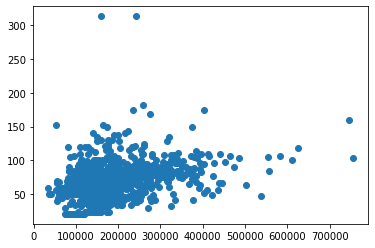

In [ ]:
plt.scatter(data.SalePrice, data.LotFrontage)
plt.show()

In [ ]:
data['SalePrice'].corr(data['LotFrontage'])

0.3517990965706781

In [ ]:
reg = smf.ols('SalePrice ~ LotFrontage', data=data[['SalePrice', 'LotFrontage']]).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     169.4
Date:                Fri, 07 Jan 2022   Prob (F-statistic):           2.60e-36
Time:                        12:55:32   Log-Likelihood:                -15233.
No. Observations:                1201   AIC:                         3.047e+04
Df Residuals:                    1199   BIC:                         3.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9.615e+04   6881.966     13.971      0.000    8.26e+04     1.1e+05
LotFrontage  1208.0155     92.828     13.013      0.000    1025.892    1390.139
==============================================================================
Omnibus:                      437.519   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2133.870
Skew:                           1.638   Prob(JB):                         0.00
Kurtosis:                       8.649   Cond. No.                         226.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

here between this two variables SalePrice and LotArea, we have a correlation above 0.35 and correlations between 0.2 and 0.4 considered to be moderate. There are outliers clearly standing out (they will cause trouble in e.g. regression as they will have an impact on the way the line is defined). Therefore, we will to apply square root transform.


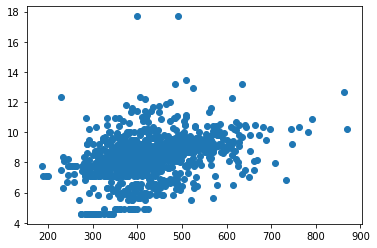

In [ ]:
data['lot_frontage'] = np.sqrt((data['LotFrontage']))
data['sale_price'] = np.sqrt((data['SalePrice']))
plt.scatter(data.sale_price, data.lot_frontage)
plt.show()

In [ ]:
data['sale_price'].corr(data['lot_frontage'])

0.3706536344787797

In [ ]:
reg = smf.ols('sale_price ~ lot_frontage', data=data[['sale_price', 'lot_frontage']]).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     191.0
Date:                Fri, 07 Jan 2022   Prob (F-statistic):           2.06e-40
Time:                        12:56:02   Log-Likelihood:                -7013.2
No. Observations:                1201   AIC:                         1.403e+04
Df Residuals:                    1199   BIC:                         1.404e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      219.6980     14.381     15.277      0.000     191.483     247.913
lot_frontage    23.7446      1.718     13.819      0.000      20.373      27.116
==============================================================================
Omnibus:                      150.620   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.880
Skew:                           0.815   Prob(JB):                     2.24e-57
Kurtosis:                       4.598   Cond. No.                         50.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Will remove outliers from our data

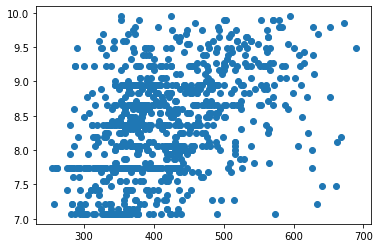

In [ ]:
data['lot_frontage'] = np.sqrt((data['LotFrontage']))
data['sale_price'] = np.sqrt((data['SalePrice']))
data_lot_frontage_selected = data.loc[
                                      (data['lot_frontage'] < 10) & 
                                      (data['sale_price'] < 700) & 
                                      (data['sale_price'] > 250) & 
                                      (data['lot_frontage'] > 7)
                                    ]
plt.scatter(data_lot_frontage_selected.sale_price, data_lot_frontage_selected.lot_frontage)
plt.show()

In [ ]:
data_lot_frontage_selected['sale_price'].corr(data_lot_frontage_selected['lot_frontage'])

0.44564761485896187

So with removing outliers and applying root sqaure transform we increase correlation to elatively strong.

In [ ]:
reg = smf.ols('sale_price ~ lot_frontage', data=data_lot_frontage_selected[['sale_price', 'lot_frontage']]).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     232.2
Date:                Tue, 28 Dec 2021   Prob (F-statistic):           5.22e-47
Time:                        21:06:41   Log-Likelihood:                -5338.2
No. Observations:                 939   AIC:                         1.068e+04
Df Residuals:                     937   BIC:                         1.069e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        9.3030     26.590      0.350      0.727     -42.880      61.486
lot_frontage    48.3053      3.170     15.238      0.000      42.084      54.526
==============================================================================
Omnibus:                       86.907   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.589
Skew:                           0.730   Prob(JB):                     2.92e-26
Kurtosis:                       3.936   Cond. No.                         97.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### YearBuilt

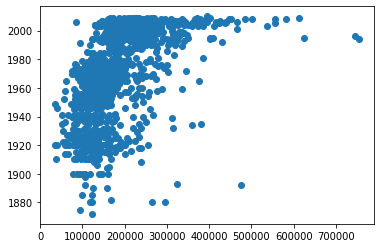

In [ ]:
plt.scatter(data.SalePrice, data.YearBuilt)
plt.show()

In [ ]:
data['SalePrice'].corr(data['YearBuilt'])

0.5228973328794969

here between this two variables SalePrice and YearBuilt, we have a correlation above 0.4, so it is considred to be relatively strong

### LotArea

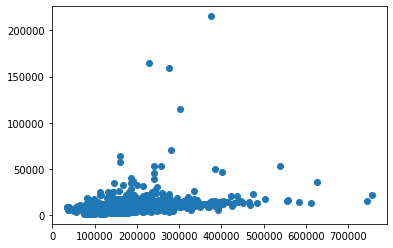

In [ ]:
plt.scatter(data.SalePrice, data.LotArea)
plt.show()

In [ ]:
data['SalePrice'].corr(data['LotArea'])

0.2638433538714057

here between this two variables SalePrice and LotArea, we have a correlation above 0.26 and correlations between 0.2 and 0.4 considered to be moderate. There are outliers clearly standing out (they will cause trouble in e.g. regression as they will have an impact on the way the line is defined). Therefore, we need to remove outliers from our dataset.

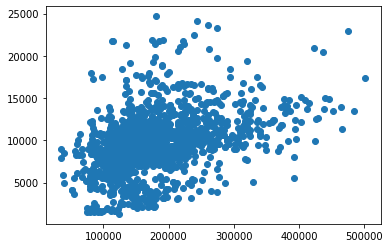

In [ ]:
data_lot_area_selected = data.loc[(data['LotArea'] < 25000) & (data['SalePrice'] < 550000)]
plt.scatter(data_lot_area_selected.SalePrice, data_lot_area_selected.LotArea)
plt.show()

In [ ]:
data_lot_area_selected['SalePrice'].corr(data_lot_area_selected['LotArea'])

0.41032899532183065

Here we remove most of our outliers and correletion coeficient increases to relatively strong. So with transformation here we overcome potential problem of not high correlation.

### BsmtFinSF1

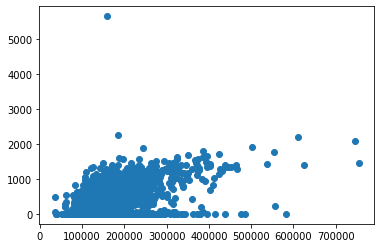

In [ ]:
plt.scatter(data.SalePrice, data.BsmtFinSF1)
plt.show()

In [ ]:
data['SalePrice'].corr(data['BsmtFinSF1'])

0.3864198062421532

here between this two variables SalePrice and LotArea, we have a correlation above 0.38 and correlations between 0.2 and 0.4 considered to be moderate. There are outliers clearly standing out (they will cause trouble in e.g. regression as they will have an impact on the way the line is defined). 
Moreover, here we can see two patterns.
- x increases and y = 0;
- x increases and y increases as well.

We will try to remove outliers from our dataset.

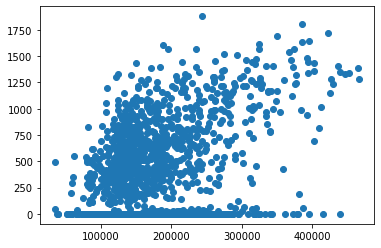

In [ ]:
data_bsmt_fin_sf1_selected = data.loc[(data['BsmtFinSF1'] < 2000) & (data['SalePrice'] < 470000)]
plt.scatter(data_bsmt_fin_sf1_selected.SalePrice, data_bsmt_fin_sf1_selected.BsmtFinSF1)
plt.show()

In [ ]:
data_bsmt_fin_sf1_selected['SalePrice'].corr(data_bsmt_fin_sf1_selected['BsmtFinSF1'])

0.39027180229150804

Here we tried to increase correlation coefficient by removing some outliers, but our improvements are not significant.

### BsmtUnfSF

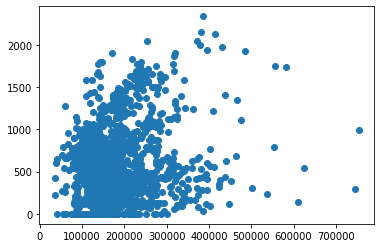

In [ ]:
plt.scatter(data.SalePrice, data.BsmtUnfSF)
plt.show()

In [ ]:
data['SalePrice'].corr(data['BsmtUnfSF'])

0.21447910554696892

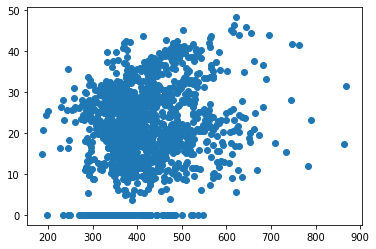

In [ ]:
data['bsmt_unf_sf'] = np.sqrt((data['BsmtUnfSF']))
plt.scatter(data.sale_price, data.bsmt_unf_sf)
plt.show()

In [ ]:
data['SalePrice'].corr(data['bsmt_unf_sf'])

0.20142843668694665

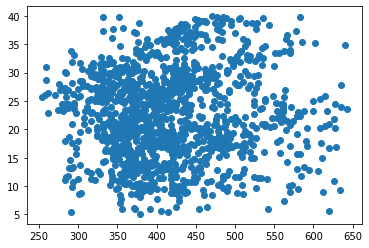

In [ ]:
data_bsmt_unf_sf_selected = data.loc[
                                      (data['bsmt_unf_sf'] < 40) & 
                                      (data['sale_price'] < 650) & 
                                      (data['sale_price'] > 250) & 
                                      (data['bsmt_unf_sf'] > 5)
                                    ]
plt.scatter(data_bsmt_unf_sf_selected.sale_price, data_bsmt_unf_sf_selected.bsmt_unf_sf)
plt.show()

In [ ]:
data_bsmt_unf_sf_selected['sale_price'].corr(data_bsmt_unf_sf_selected['bsmt_unf_sf'])

0.05764707879182053

In [ ]:
from scipy import stats
stats.boxcox(data['LotFrontage'])


(array([2.69932554e+14, 1.56763129e+15, 3.95613839e+14, ...,
        3.07206520e+14, 3.95613839e+14, 9.07362381e+14]), 8.472135811722177)

In [ ]:
data_bsmt_unf_sf_selected['SalePrice'].corr(data_bsmt_unf_sf_selected['BsmtUnfSF'])

0.050045404784276215

here between this two variables SalePrice and LotArea, we have a correlation above 0.21 and correlations between 0.2 and 0.4 considered to be moderate. There are outliers clearly standing out (they will cause trouble in e.g. regression as they will have an impact on the way the line is defined). Therefore, we need to remove outliers from our dataset.

In task there are no written that we need to apply transformations which will overcome possible issues. Removing outliers doesn't help, so we coul try to use log or 1/x. But this is not stated in the task, so I will not prove my theory.

## 3

In [ ]:
x = data.LotArea.values
y = data.SalePrice.values
x = y.reshape(len(data['LotArea']), 1)
y = y.reshape(len(data['SalePrice']), 1)
reg = LinearRegression().fit(x, y)

So we have H0: β=0 hypothesis and it tells about coefficient insignificance.

Alternative hypothesis H1: β≠0.
To test this hypothesis, we have to find t-statistic.

In [ ]:
from IPython.display import display, Math
init_printing()
val, var = symbols("β_i Var")
hat_val = symbols('\hat{β_i}')
var_val = symbols('\ Var({β_i})')
var_dot = symbols('\dot{β_i}')
x = (hat_val - var_dot) / (sqrt(var_val))
print('Formula')
display(Math('x = '+latex(x)))

Formula


<IPython.core.display.Math object>

β(i) with hat - value of the parameter estimation i

β(i)* - targer value(=0)

Var(β(i)) - st. dev. of the i parameter.

β(i) with hat can be found with OLS estimator.

Var(β(i)) - can be found with β cov. matrix

In [ ]:
lot_area_model = smf.ols('LotArea ~ SalePrice', data=data[['LotArea', 'SalePrice']]).fit()

In [ ]:
from IPython.display import HTML, display

lot_area_model_summary = lot_area_model.summary()

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(lot_area_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

P>|t|: This is a two tailed hypothesis test where the null hypothesis is that SalePrice has no effect on LotArea. Since the p-value is so low it is approximately zero, then there is strong statistical evidence to reject the claim that SalePrice has no effect on LotArea.

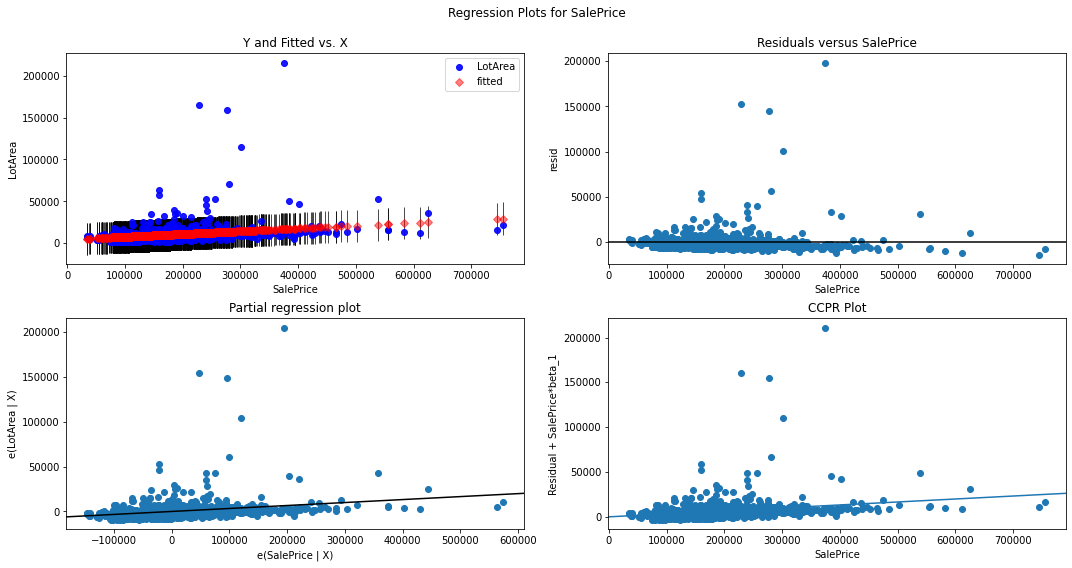

In [ ]:
fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(lot_area_model, "SalePrice", fig=fig)

In [ ]:
lot_area_model.pvalues


Intercept    9.160369e-13
SalePrice    1.123139e-24
dtype: float64

goodness of model

**RSS = $\sum{i=1}^{N} (y_i - \hat{yi})^2$ - residual sum of squares**

**ESS = $\sum{i=1}^{N} (\hat{yi} - \bar{y})^2$ - explained sum of squares**


**TSS = $\sum{i=1}^{N} (yi - \bar{y})^2$ - total sum of 
squares**

TSS = RSS + ESS

In [ ]:
def gom(true, predicted):
    mean = np.mean(true)
    rss = np.sum([(predicted - true)**2])
    ess = np.sum([(predicted - mean)**2])
    result_tss = rss + ess
    return result_tss, rss, ess

predicted = lot_area_model.predict(data.SalePrice)
TSS, RSS, ESS = gom(data.LotArea, predicted)
print('TSS = {:.2f}'.format(TSS))

TSS = 145353822839.85


R-squared measures the proportion of the variation in your dependent variable (Y) explained by your independent variables (X) for a linear regression model. Adjusted R-squared adjusts the statistic based on the number of independent variables in the model. Also R-squared cannot determine whether the coefficient estimates and predictions are biased. Also R-squared does not indicate whether a regression model is adequate.


## 4

If you wish to argue that MSSbuclass is insignificant...

I will not argue) I agree that MSSbuclass is significant.

So we have H0: β=0 hypothesis and it tells about coefficient insignificance. 

In [ ]:
data_4 = data[['SalePrice']]
dum_string = pd.get_dummies(data.MSSubClass_string, prefix_sep=" ")
data_4 = data_4.join(dum_string)
data_4

,SalePrice,1-1/2 STORY - UNFINISHED ALL AGES,1-1/2 STORY FINISHED ALL AGES,1-STORY 1945 & OLDER,1-STORY 1946 & NEWER ALL STYLES,1-STORY PUD (Planned Unit Development) - 1946 & NEWER,1-STORY W/FINISHED ATTIC ALL AGES,2 FAMILY CONVERSION - ALL STYLES AND AGES,2-1/2 STORY ALL AGES,2-STORY 1945 & OLDER,2-STORY 1946 & NEWER,2-STORY PUD - 1946 & NEWER,DUPLEX - ALL STYLES AND AGES,PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,SPLIT FOYER,SPLIT OR MULTI-LEVEL
0,208500,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,181500,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,223500,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,140000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,250000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1456,210000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1457,266500,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1458,142125,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
regression_4 = smf.ols('SalePrice ~ MSSubClass_string',data = data).fit()
regression_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     33.73
Date:                Sun, 16 Jan 2022   Prob (F-statistic):           8.66e-79
Time:                        16:47:58   Log-Likelihood:                -18338.
No. Observations:                1460   AIC:                         3.671e+04
Df Residuals:                    1445   BIC:                         3.678e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================================
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                   1.086e+05      2e+04      5.428      0.000    6.93e+04    1.48e+05
MSSubClass_string[T.1-1/2 STORY FINISHED ALL AGES]                          3.471e+04   2.08e+04      1.667      0.096   -6134.150    7.56e+04
MSSubClass_string[T.1-STORY 1945 & OLDER]                                  -1.276e+04   2.17e+04     -0.589      0.556   -5.53e+04    2.98e+04
MSSubClass_string[T.1-STORY 1946 & NEWER ALL STYLES]                        7.663e+04   2.02e+04      3.788      0.000     3.7e+04    1.16e+05
MSSubClass_string[T.1-STORY PUD (Planned Unit Development) - 1946 & NEWER]  9.219e+04   2.13e+04      4.320      0.000    5.03e+04    1.34e+05
MSSubClass_string[T.1-STORY W/FINISHED ATTIC ALL AGES]                      4.753e+04      4e+04      1.188      0.235    -3.1e+04    1.26e+05
MSSubClass_string[T.2 FAMILY CONVERSION - ALL STYLES AND AGES]              2.102e+04   2.37e+04      0.888      0.375   -2.54e+04    6.75e+04
MSSubClass_string[T.2-1/2 STORY ALL AGES]                                   8.385e+04   2.65e+04      3.168      0.002    3.19e+04    1.36e+05
MSSubClass_string[T.2-STORY 1945 & OLDER]                                   5.818e+04   2.19e+04      2.655      0.008    1.52e+04    1.01e+05
MSSubClass_string[T.2-STORY 1946 & NEWER]                                   1.314e+05   2.04e+04      6.438      0.000    9.13e+04    1.71e+05
MSSubClass_string[T.2-STORY PUD - 1946 & NEWER]                             3.006e+04   2.18e+04      1.377      0.169   -1.28e+04    7.29e+04
MSSubClass_string[T.DUPLEX - ALL STYLES AND AGES]                           2.495e+04   2.22e+04      1.124      0.261   -1.86e+04    6.85e+04
MSSubClass_string[T.PUD - MULTILEVEL - INCL SPLIT LEV/FOYER]               -6291.6667   2.97e+04     -0.212      0.832   -6.45e+04    5.19e+04
MSSubClass_string[T.SPLIT FOYER]                                            3.922e+04   2.53e+04      1.550      0.121   -1.04e+04    8.89e+04
MSSubClass_string[T.SPLIT OR MULTI-LEVEL]                                   6.114e+04    2.2e+04      2.782      0.005     1.8e+04    1.04e+05
==============================================================================
Omnibus:                      708.394   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5221.198
Skew:                           2.138   Prob(JB):                         0.00
Kurtosis:                      11.218   Cond. No.                         48.0
==============================================================================

Warnings:
[1] Standard Errors assu

In [ ]:
alpha = 0.05
for name, pvalue in zip(regression_4.pvalues.index, regression_4.pvalues):
    if pvalue <= alpha:
        print('{}: {:.3f}'.format(name, pvalue))

Intercept: 0.000
MSSubClass_string[T.1-STORY 1946 & NEWER ALL STYLES]: 0.000
MSSubClass_string[T.1-STORY PUD (Planned Unit Development) - 1946 & NEWER]: 0.000
MSSubClass_string[T.2-1/2 STORY ALL AGES]: 0.002
MSSubClass_string[T.2-STORY 1945 & OLDER]: 0.008
MSSubClass_string[T.2-STORY 1946 & NEWER]: 0.000
MSSubClass_string[T.SPLIT OR MULTI-LEVEL]: 0.005


As we can see we can reject the hypothesis about coefficient insignificance as p-value tells us about it for all dummies listed above.

In [ ]:
summary = regression_4.summary()
f_stat = float(summary.tables[0][2][3].data)
f_prob = float(summary.tables[0][3][3].data)

print('F-test: statistic={:.2f}, p-value={:.2f}'.format(f_stat, f_prob))

F-test: statistic=33.73, p-value=0.00


In [ ]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     33.73
Date:                Sun, 16 Jan 2022   Prob (F-statistic):           8.66e-79
Time:                        14:23:28   Log-Likelihood:                -18338.
No. Observations:                1460   AIC:                         3.671e+04
Df Residuals:                    1445   BIC:                         3.678e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.296e+05   1.27e+04     10.244      0.000    1.05e+05    1.54e+05
Q(20)       5.561e+04    1.3e+04      4.277      0.000    3.01e+04    8.11e+04
Q(30)      -3.378e+04   1.52e+04     -2.229      0.026   -6.35e+04   -4054.237
Q(40)       2.651e+04   3.69e+04      0.719      0.472   -4.58e+04    9.89e+04
Q(45)      -2.102e+04   2.37e+04     -0.888      0.375   -6.75e+04    2.54e+04
Q(50)       1.369e+04   1.39e+04      0.984      0.325   -1.36e+04     4.1e+04
Q(60)       1.103e+05   1.33e+04      8.313      0.000    8.43e+04    1.36e+05
Q(70)       3.716e+04   1.55e+04      2.398      0.017    6761.552    6.76e+04
Q(75)       6.282e+04   2.15e+04      2.928      0.003    2.07e+04    1.05e+05
Q(80)       4.012e+04   1.56e+04      2.574      0.010    9551.488    7.07e+04
Q(85)        1.82e+04      2e+04      0.910      0.363    -2.1e+04    5.74e+04
Q(90)       3927.7436   1.59e+04      0.247      0.805   -2.72e+04    3.51e+04
Q(120)      7.117e+04   1.47e+04      4.850      0.000    4.24e+04    9.99e+04
Q(160)      9034.0476   1.54e+04      0.588      0.557   -2.11e+04    3.92e+04
Q(180)     -2.731e+04   2.53e+04     -1.079      0.281    -7.7e+04    2.23e+04
==============================================================================
Omnibus:                      708.394   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5221.198
Skew:                           2.138   Prob(JB):                         0.00
Kurtosis:                      11.218   Cond. No.                         31.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here test for general linear hypothesis(F-test) helps us to see if at least 1 coef isn't 0 and due to this reason at least 1 feature has an impact on target variable. 
Here we can see that p-value equals to zero, so we can reject the null-hypothesis H0 that all coefficients equal to zero.

As all hypothesis are equal to 0, so r=0.

In [ ]:
from sympy import *
Matrix([
     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
])

Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [ ]:
r = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
r

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

## 5

Increasing LotArea, by 1 sq. f. impact on the SalePrice coef and it is increaisng as well.

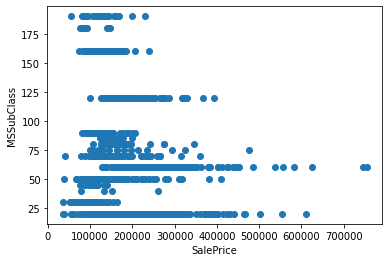

In [ ]:
plt.scatter(data.SalePrice, data.MSSubClass)
plt.xlabel("SalePrice")
plt.ylabel("MSSubClass")
plt.show()

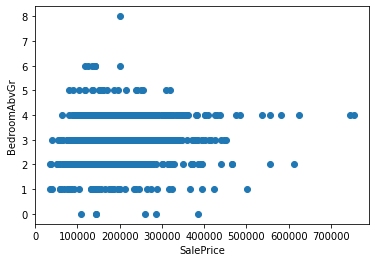

In [ ]:
plt.scatter(data.SalePrice, data.BedroomAbvGr)
plt.xlabel("SalePrice")
plt.ylabel("BedroomAbvGr")
plt.show()

BedroomAbvGr - means change in price which depends on number of bedrooms  above the groud level

MSSubClass means change in price with a certain house type(in this case it is 1-STORY 1946 & NEWER ALL STYLES).

In case of log. It is implemented with np.log below.
Here will have some conclussions.

Now increasing LotArea, by 1% impact on the SalePrice coef and it is increasing price in percent as well.

MSSubClass means change in price in percentage with a certain house type(in this case it is 1-STORY 1946 & NEWER ALL STYLES).

BedroomAbvGr means change in price in percentage which depends on number of bedrooms above the groud level

## 6

In [ ]:
# Let's encode every categorical feature

data2 = pd.read_csv('train_1.csv', delimiter=',')
mszoning_to_code = {marital:i for i, marital in enumerate(data2['MSZoning'].unique())}
street_to_code = {gender:i for i, gender in enumerate(data2['Street'].unique())}
lot_to_code = {retire:i for i, retire in enumerate(data2['LotShape'].unique())}
land_to_code = {marital:i for i, marital in enumerate(data2['LandContour'].unique())}
utilities_to_code = {gender:i for i, gender in enumerate(data2['Utilities'].unique())}
lotconfig_to_code = {retire:i for i, retire in enumerate(data2['LotConfig'].unique())}
neighborhood_to_code = {marital:i for i, marital in enumerate(data2['Neighborhood'].unique())}
landslope_to_code = {gender:i for i, gender in enumerate(data2['LandSlope'].unique())}
condition1_to_code = {retire:i for i, retire in enumerate(data2['Condition1'].unique())}
condition2_to_code = {marital:i for i, marital in enumerate(data2['Condition2'].unique())}
bigtype_to_code = {gender:i for i, gender in enumerate(data2['BldgType'].unique())}
housestyle_to_code = {retire:i for i, retire in enumerate(data2['HouseStyle'].unique())}
roofstyle_to_code = {marital:i for i, marital in enumerate(data2['RoofStyle'].unique())}
roofmatl_to_code = {gender:i for i, gender in enumerate(data2['RoofMatl'].unique())}
exterior1st_to_code = {retire:i for i, retire in enumerate(data2['Exterior1st'].unique())}
exterior2nd_to_code = {marital:i for i, marital in enumerate(data2['Exterior2nd'].unique())}
exterQual_to_code = {gender:i for i, gender in enumerate(data2['ExterQual'].unique())}
exterCond_to_code = {retire:i for i, retire in enumerate(data2['ExterCond'].unique())}
foundation_to_code = {marital:i for i, marital in enumerate(data2['Foundation'].unique())}
heating_to_code = {gender:i for i, gender in enumerate(data2['Heating'].unique())}
heatingqc_to_code = {retire:i for i, retire in enumerate(data2['HeatingQC'].unique())}
centralair_to_code = {marital:i for i, marital in enumerate(data2['CentralAir'].unique())}
kitchenqual_to_code = {gender:i for i, gender in enumerate(data2['KitchenQual'].unique())}
functional_to_code = {retire:i for i, retire in enumerate(data2['Functional'].unique())}
paveddrive_to_code = {gender:i for i, gender in enumerate(data2['PavedDrive'].unique())}
saletype_to_code = {retire:i for i, retire in enumerate(data2['SaleType'].unique())}
salecondition_to_code = {gender:i for i, gender in enumerate(data2['SaleCondition'].unique())}
masvnrtype_to_code = {gender:i for i, gender in enumerate(data2['MasVnrType'].unique())}
bsmtqual_to_code = {gender:i for i, gender in enumerate(data2['BsmtQual'].unique())}
bsmtexposure_to_code = {gender:i for i, gender in enumerate(data2['BsmtExposure'].unique())}
bsmtfinsf1_to_code = {gender:i for i, gender in enumerate(data2['BsmtFinSF1'].unique())}
bsmtfintype1_to_code = {gender:i for i, gender in enumerate(data2['BsmtFinType1'].unique())}
bsmtfinsf1_to_code = {gender:i for i, gender in enumerate(data2['BsmtFinSF2'].unique())}
bsmtfintype2_to_code = {gender:i for i, gender in enumerate(data2['BsmtFinType2'].unique())}
garagetype_to_code = {gender:i for i, gender in enumerate(data2['GarageType'].unique())}
electrical_to_code = {gender:i for i, gender in enumerate(data2['Electrical'].unique())}
garagequal_to_code = {gender:i for i, gender in enumerate(data2['GarageQual'].unique())}
garagefinish_to_code = {gender:i for i, gender in enumerate(data2['GarageFinish'].unique())}
fence_to_code = {gender:i for i, gender in enumerate(data2['Fence'].unique())}
miscfeature_to_code = {gender:i for i, gender in enumerate(data2['MiscFeature'].unique())}
openporchsf_to_code = {gender:i for i, gender in enumerate(data2['OpenPorchSF'].unique())}
garagecond_to_code = {gender:i for i, gender in enumerate(data2['GarageCond'].unique())}
wooddecksf_to_code = {gender:i for i, gender in enumerate(data2['WoodDeckSF'].unique())}
bsmtcond_to_code = {gender:i for i, gender in enumerate(data2['BsmtCond'].unique())}
fireplacequ_to_code = {gender:i for i, gender in enumerate(data2['FireplaceQu'].unique())}
alley_to_code = {gender:i for i, gender in enumerate(data2['Alley'].unique())}
poolqc_to_code = {gender:i for i, gender in enumerate(data2['PoolQC'].unique())}

data2['MSZoning_code'] = data2['MSZoning'].map(lambda x: mszoning_to_code[x])
data2.drop('MSZoning', axis=1, inplace=True)

data2['Street_code'] = data2['Street'].map(lambda x: street_to_code[x])
data2.drop('Street', axis=1, inplace=True)

data2['LotShape_code'] = data2['LotShape'].map(lambda x: lot_to_code[x])
data2.drop('LotShape', axis=1, inplace=True)

data2['LandContour_code'] = data2['LandContour'].map(lambda x: land_to_code[x])
data2.drop('LandContour', axis=1, inplace=True)

data2['Utilities_code'] = data2['Utilities'].map(lambda x: utilities_to_code[x])
data2.drop('Utilities', axis=1, inplace=True)

data2['LotConfig_code'] = data2['LotConfig'].map(lambda x: lotconfig_to_code[x])
data2.drop('LotConfig', axis=1, inplace=True)

data2['Neighborhood_code'] = data2['Neighborhood'].map(lambda x: neighborhood_to_code[x])
data2.drop('Neighborhood', axis=1, inplace=True)

data2['LandSlope_code'] = data2['LandSlope'].map(lambda x: landslope_to_code[x])
data2.drop('LandSlope', axis=1, inplace=True)

data2['Condition1_code'] = data2['Condition1'].map(lambda x: condition1_to_code[x])
data2.drop('Condition1', axis=1, inplace=True)

data2['Condition2_code'] = data2['Condition2'].map(lambda x: condition2_to_code[x])
data2.drop('Condition2', axis=1, inplace=True)

data2['BldgType_code'] = data2['BldgType'].map(lambda x: bigtype_to_code[x])
data2.drop('BldgType', axis=1, inplace=True)

data2['HouseStyle_code'] = data2['HouseStyle'].map(lambda x: housestyle_to_code[x])
data2.drop('HouseStyle', axis=1, inplace=True)

data2['RoofStyle_code'] = data2['RoofStyle'].map(lambda x: roofstyle_to_code[x])
data2.drop('RoofStyle', axis=1, inplace=True)

data2['RoofMatl_code'] = data2['RoofMatl'].map(lambda x: roofmatl_to_code[x])
data2.drop('RoofMatl', axis=1, inplace=True)

data2['Exterior1st_code'] = data2['Exterior1st'].map(lambda x: exterior1st_to_code[x])
data2.drop('Exterior1st', axis=1, inplace=True)

data2['Exterior2nd_code'] = data2['Exterior2nd'].map(lambda x: exterior2nd_to_code[x])
data2.drop('Exterior2nd', axis=1, inplace=True)

data2['ExterQual_code'] = data2['ExterQual'].map(lambda x: exterQual_to_code[x])
data2.drop('ExterQual', axis=1, inplace=True)

data2['ExterCond_code'] = data2['ExterCond'].map(lambda x: exterCond_to_code[x])
data2.drop('ExterCond', axis=1, inplace=True)

data2['Foundation_code'] = data2['Foundation'].map(lambda x: foundation_to_code[x])
data2.drop('Foundation', axis=1, inplace=True)

data2['Heating_code'] = data2['Heating'].map(lambda x: heating_to_code[x])
data2.drop('Heating', axis=1, inplace=True)

data2['HeatingQC_code'] = data2['HeatingQC'].map(lambda x: heatingqc_to_code[x])
data2.drop('HeatingQC', axis=1, inplace=True)

data2['CentralAir_code'] = data2['CentralAir'].map(lambda x: centralair_to_code[x])
data2.drop('CentralAir', axis=1, inplace=True)

data2['KitchenQual_code'] = data2['KitchenQual'].map(lambda x: kitchenqual_to_code[x])
data2.drop('KitchenQual', axis=1, inplace=True)

data2['Functional_code'] = data2['Functional'].map(lambda x: functional_to_code[x])
data2.drop('Functional', axis=1, inplace=True)

data2['PavedDrive_code'] = data2['PavedDrive'].map(lambda x: paveddrive_to_code[x])
data2.drop('PavedDrive', axis=1, inplace=True)

data2['SaleType_code'] = data2['SaleType'].map(lambda x: saletype_to_code[x])
data2.drop('SaleType', axis=1, inplace=True)

data2['SaleCondition_code'] = data2['SaleCondition'].map(lambda x: salecondition_to_code[x])
data2.drop('SaleCondition', axis=1, inplace=True)

data2['MasVnrType_code'] = data2['MasVnrType'].map(lambda x: masvnrtype_to_code[x])
data2.drop('MasVnrType', axis=1, inplace=True)



data2['BsmtQual_code'] = data2['BsmtQual'].map(lambda x: bsmtqual_to_code[x])
data2.drop('BsmtQual', axis=1, inplace=True)

data2['BsmtExposure_code'] = data2['BsmtExposure'].map(lambda x: bsmtexposure_to_code[x])
data2.drop('BsmtExposure', axis=1, inplace=True)

data2['BsmtFinType1_code'] = data2['BsmtFinType1'].map(lambda x: bsmtfintype1_to_code[x])
data2.drop('BsmtFinType1', axis=1, inplace=True)

#data2['BsmtFinSF1_code'] = data2['BsmtFinSF1'].map(lambda x: bsmtfinsf1_to_code[x])
#data2.drop('BsmtFinSF1', axis=1, inplace=True)

#data2['BsmtFinSF2_code'] = data2['BsmtFinSF2'].map(lambda x: bsmtfinsf2_to_code[x])
#data2.drop('BsmtFinSF2', axis=1, inplace=True)

data2['BsmtFinType2_code'] = data2['BsmtFinType2'].map(lambda x: bsmtfintype2_to_code[x])
data2.drop('BsmtFinType2', axis=1, inplace=True)

data2['Electrical_code'] = data2['Electrical'].map(lambda x: electrical_to_code[x])
data2.drop('Electrical', axis=1, inplace=True)

data2['GarageType_code'] = data2['GarageType'].map(lambda x: garagetype_to_code[x])
data2.drop('GarageType', axis=1, inplace=True)

data2['GarageFinish_code'] = data2['GarageFinish'].map(lambda x: garagefinish_to_code[x])
data2.drop('GarageFinish', axis=1, inplace=True)

data2['GarageQual_code'] = data2['GarageQual'].map(lambda x: garagequal_to_code[x])
data2.drop('GarageQual', axis=1, inplace=True)

data2['GarageCond_code'] = data2['GarageCond'].map(lambda x: garagecond_to_code[x])
data2.drop('GarageCond', axis=1, inplace=True)

data2['WoodDeckSF_code'] = data2['WoodDeckSF'].map(lambda x: wooddecksf_to_code[x])
data2.drop('WoodDeckSF', axis=1, inplace=True)

data2['OpenPorchSF_code'] = data2['OpenPorchSF'].map(lambda x: openporchsf_to_code[x])
data2.drop('OpenPorchSF', axis=1, inplace=True)

data2['Fence_code'] = data2['Fence'].map(lambda x: fence_to_code[x])
data2.drop('Fence', axis=1, inplace=True)

data2['MiscFeature_code'] = data2['MiscFeature'].map(lambda x: miscfeature_to_code[x])
data2.drop('MiscFeature', axis=1, inplace=True)

data2['BsmtCond_code'] = data2['BsmtCond'].map(lambda x: bsmtcond_to_code[x])
data2.drop('BsmtCond', axis=1, inplace=True)

data2['FireplaceQu_code'] = data2['FireplaceQu'].map(lambda x: fireplacequ_to_code[x])
data2.drop('FireplaceQu', axis=1, inplace=True)

data2['Alley_code'] = data2['Alley'].map(lambda x: alley_to_code[x])
data2.drop('Alley', axis=1, inplace=True)

data2['PoolQC_code'] = data2['PoolQC'].map(lambda x: poolqc_to_code[x])
data2.drop('PoolQC', axis=1, inplace=True)

labels = data2.SalePrice
data2.drop('SalePrice', axis=1, inplace=True)


In [ ]:
data3 = data2.fillna(0)
model_with_all_parameters = sm.OLS(labels, data3).fit()

In [ ]:
model_with_all_parameters.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              774.2
Date:                Sat, 15 Jan 2022   Prob (F-statistic):                        0.00
Time:                        15:11:28   Log-Likelihood:                         -17101.
No. Observations:                1460   AIC:                                  3.436e+04
Df Residuals:                    1382   BIC:                                  3.477e+04
Df Model:                          78                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Id                    -1.6846      2.002     -0.841      0.400      -5.613       2.244
MSSubClass           -69.2555     43.367     -1.597      0.111    -154.327      15.816
LotFrontage          -16.6380     26.737     -0.622      0.534     -69.088      35.812
LotArea                0.4207      0.104      4.061      0.000       0.217       0.624
OverallQual         1.375e+04   1093.612     12.577      0.000    1.16e+04    1.59e+04
OverallCond         6765.1526    987.997      6.847      0.000    4827.018    8703.288
YearBuilt            431.1667     66.627      6.471      0.000     300.465     561.868
YearRemodAdd         120.4883     64.719      1.862      0.063      -6.470     247.447
MasVnrArea            28.9940      5.720      5.069      0.000      17.773      40.215
BsmtFinSF1             7.4705      2.824      2.645      0.008       1.931      13.010
BsmtFinSF2            10.3515      5.881      1.760      0.079      -1.186      21.889
BsmtUnfSF             -1.2849      2.910     -0.442      0.659      -6.993       4.423
TotalBsmtSF           16.5371      3.488      4.741      0.000       9.695      23.379
1stFlrSF              23.7469      5.819      4.081      0.000      12.333      35.161
2ndFlrSF              24.3002      5.434      4.472      0.000      13.640      34.960
LowQualFinSF         -22.6400     13.634     -1.661      0.097     -49.385       4.106
GrLivArea             25.4072      5.216      4.871      0.000      15.175      35.639
BsmtFullBath        7547.5968   2397.950      3.148      0.002    2843.581    1.23e+04
BsmtHalfBath       -1818.5957   3674.969     -0.495      0.621   -9027.717    5390.525
FullBath            5792.0147   2554.377      2.267      0.024     781.139    1.08e+04
HalfBath             802.6285   2405.722      0.334      0.739   -3916.634    5521.891
BedroomAbvGr       -8001.7969   1551.531     -5.157      0.000    -1.1e+04   -4958.186
KitchenAbvGr       -2.179e+04   4809.296     -4.530      0.000   -3.12e+04   -1.24e+04
TotRmsAbvGrd        3847.3504   1136.330      3.386      0.001    1618.233    6076.468
Fireplaces           -19.6453   2111.162     -0.009      0.993   -4161.073    4121.783
GarageYrBlt            0.6885      4.468      0.154      0.878      -8.077       9.454
GarageCars           1.17e+04   2712.884      4.312      0.000    6376.751     1.7e+04
GarageArea             6.4057      8.978      0.714      0.476     -11.205      24.017
EnclosedPorch         -3.6656     15.033     -0.244      0.807     -33.155      25.824
3SsnPorch             15.1861     27.770      0.547      0.585     -39.289      69.661
ScreenPorch           57.4397     15.290      3.757      0.000      27.446      87.434
PoolArea             696.9

p-values of LotArea, BedroomAbvGr are < 0.05. It means the importance of those vars.



In [ ]:
labels_log = np.log(labels)
model_with_all_parameters_and_log = sm.OLS(labels_log, data3).fit()
model_with_all_parameters_and_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.457e+05
Date:                Fri, 14 Jan 2022   Prob (F-statistic):                        0.00
Time:                        07:10:47   Log-Likelihood:                          877.48
No. Observations:                1460   AIC:                                     -1599.
Df Residuals:                    1382   BIC:                                     -1187.
Df Model:                          78                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Id                 -1.192e-05   8.99e-06     -1.327      0.185   -2.96e-05    5.71e-06
MSSubClass          6.611e-05      0.000      0.340      0.734      -0.000       0.000
LotFrontage           -0.0002      0.000     -1.445      0.149      -0.000     6.2e-05
LotArea             1.805e-06   4.65e-07      3.883      0.000    8.93e-07    2.72e-06
OverallQual            0.0704      0.005     14.331      0.000       0.061       0.080
OverallCond            0.0448      0.004     10.110      0.000       0.036       0.054
YearBuilt              0.0023      0.000      7.715      0.000       0.002       0.003
YearRemodAdd           0.0008      0.000      2.690      0.007       0.000       0.001
MasVnrArea          1.734e-05   2.57e-05      0.675      0.500    -3.3e-05    6.77e-05
BsmtFinSF1          1.617e-05   1.27e-05      1.276      0.202   -8.69e-06     4.1e-05
BsmtFinSF2          3.938e-05   2.64e-05      1.492      0.136   -1.24e-05    9.12e-05
BsmtUnfSF          -1.021e-05   1.31e-05     -0.782      0.434   -3.58e-05    1.54e-05
TotalBsmtSF         4.534e-05   1.57e-05      2.896      0.004    1.46e-05    7.61e-05
1stFlrSF               0.0001   2.61e-05      4.355      0.000    6.25e-05       0.000
2ndFlrSF            3.192e-05   2.44e-05      1.309      0.191   -1.59e-05    7.98e-05
LowQualFinSF       -1.673e-05   6.12e-05     -0.273      0.785      -0.000       0.000
GrLivArea              0.0001   2.34e-05      5.507      0.000     8.3e-05       0.000
BsmtFullBath           0.0547      0.011      5.084      0.000       0.034       0.076
BsmtHalfBath           0.0162      0.016      0.980      0.327      -0.016       0.049
FullBath               0.0495      0.011      4.317      0.000       0.027       0.072
HalfBath               0.0292      0.011      2.706      0.007       0.008       0.050
BedroomAbvGr          -0.0037      0.007     -0.534      0.593      -0.017       0.010
KitchenAbvGr          -0.0520      0.022     -2.410      0.016      -0.094      -0.010
TotRmsAbvGrd           0.0161      0.005      3.147      0.002       0.006       0.026
Fireplaces             0.0193      0.009      2.039      0.042       0.001       0.038
GarageYrBlt         2.239e-05   2.01e-05      1.116      0.264    -1.7e-05    6.17e-05
GarageCars             0.0522      0.012      4.283      0.000       0.028       0.076
GarageArea          4.144e-05   4.03e-05      1.028      0.304   -3.76e-05       0.000
EnclosedPorch       7.395e-05   6.75e-05      1.096      0.273   -5.84e-05       0.000
3SsnPorch              0.0001      0.000      1.133      0.257      -0.000       0.000
ScreenPorch            0.0004   6.86e-05      5.217      0.000       0.000       0.000
PoolArea               0.0

With changing SalePrices with log, we will not consider BedroomAbvGr is significant, because it is 0.593 > 0.05. LotArea is still significant.

In [ ]:
t_25, t_75 = model_with_all_parameters.conf_int()[0], model_with_all_parameters.conf_int()[1]
t_25_lotarea, t_75_lotarea = t_25['LotArea'], t_75['LotArea']
conf_1, conf_2 = model_with_all_parameters.conf_int().loc['LotArea', :]
p_value = model_with_all_parameters.pvalues['LotArea']

print('95% CI for LotArea: {:.3f}, {:.3f}. P-value is {:.4f}'.format(t_25_lotarea, t_75_lotarea, p_value))

95% CI for LotArea: 0.217, 0.624. P-value is 0.0001


LotArea has positive CI. With 95% confidence the difference in mean for the parameter LotArea is between 0.217 and 0.624. P-value supports null hypothesis and it means we can reject the null hypothesis H0 about LotArea insignificance

About normal destribution. If the test p-value is less than the predefined significance level, we can reject the null hypothesis H0 and conclude the residuals are not from a normal distribution.

Economically it means, that most likely LotArea has an impact on the SalePrice.


Goodness-of-fit criterions(Bayes Information Criterion):

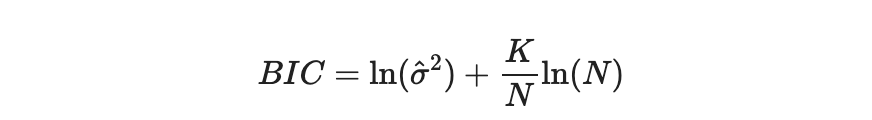

In [ ]:
print('Bayes Information Criterion: {:.2f}'.format(model_all.bic))

Bayes Information Criterion: 34769.96


## 7

To work with this task I select RFE. It is a feature selection method that fits a model and removes the weakest features the desired number of features to select is eventually reached.

In [ ]:
from sklearn.feature_selection import RFE
data7 = data2.fillna(0)
model_with_all_parameters = sm.OLS(labels, data7).fit()
est = LinearRegression()
selector = RFE(est, n_features_to_select=5)
selector.fit(data7, labels)
ranking = selector.ranking_
selected_columns = data3.columns[np.where(ranking == 1)]
print('Selected columns: ', selected_columns)
data3[selected_columns]

Selected columns:  Index(['OverallQual', 'GarageCars', 'Street_code', 'Utilities_code',
       'LandSlope_code'],
      dtype='object')


,OverallQual,GarageCars,Street_code,Utilities_code,LandSlope_code
0,7,2,0,0,0
1,6,2,0,0,0
2,7,2,0,0,0
3,7,3,0,0,0
4,8,3,0,0,0
...,...,...,...,...,...
1455,6,2,0,0,0
1456,6,2,0,0,0
1457,7,1,0,0,0
1458,5,1,0,0,0


In [ ]:
selector = RFE(est, n_features_to_select=7)
selector.fit(data7, labels)
ranking = selector.ranking_
selected_columns = data7.columns[np.where(ranking == 1)]
print('Selected columns: ', selected_columns)
data3[selected_columns]

Selected columns:  Index(['OverallQual', 'BsmtFullBath', 'FullBath', 'GarageCars', 'Street_code',
       'Utilities_code', 'LandSlope_code'],
      dtype='object')


,OverallQual,BsmtFullBath,FullBath,GarageCars,Street_code,Utilities_code,LandSlope_code
0,7,1,2,2,0,0,0
1,6,0,2,2,0,0,0
2,7,1,2,2,0,0,0
3,7,1,1,3,0,0,0
4,8,1,2,3,0,0,0
...,...,...,...,...,...,...,...
1455,6,0,2,2,0,0,0
1456,6,1,2,2,0,0,0
1457,7,0,2,1,0,0,0
1458,5,1,1,1,0,0,0


In [ ]:
model = sm.OLS(y, data3[selected_columns]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              4346.
Date:                Wed, 12 Jan 2022   Prob (F-statistic):                        0.00
Time:                        22:36:51   Log-Likelihood:                         -17854.
No. Observations:                1460   AIC:                                  3.572e+04
Df Residuals:                    1455   BIC:                                  3.574e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
OverallQual      2.15e+04    665.530     32.306      0.000    2.02e+04    2.28e+04
GarageCars      3.012e+04   2171.047     13.874      0.000    2.59e+04    3.44e+04
Street_code    -5.107e+04   2.06e+04     -2.473      0.014   -9.16e+04   -1.06e+04
Utilities_code -5.175e+04   4.96e+04     -1.043      0.297   -1.49e+05    4.55e+04
LandSlope_code  2.052e+04   4760.397      4.310      0.000    1.12e+04    2.99e+04
==============================================================================
Omnibus:                      916.022   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15504.899
Skew:                           2.629   Prob(JB):                         0.00
Kurtosis:                      18.074   Cond. No.                         249.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
data2

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_code,Street_code,LotShape_code,LandContour_code,Utilities_code,LotConfig_code,Neighborhood_code,LandSlope_code,Condition1_code,Condition2_code,BldgType_code,HouseStyle_code,RoofStyle_code,RoofMatl_code,Exterior1st_code,Exterior2nd_code,ExterQual_code,ExterCond_code,Foundation_code,Heating_code,HeatingQC_code,CentralAir_code,KitchenQual_code,Functional_code,PavedDrive_code,SaleType_code,SaleCondition_code,MasVnrType_code,BsmtQual_code,BsmtExposure_code,BsmtFinType1_code,BsmtFinType2_code,Electrical_code,GarageType_code,GarageFinish_code,GarageQual_code,GarageCond_code,WoodDeckSF_code,OpenPorchSF_code,Fence_code,MiscFeature_code,BsmtCond_code,FireplaceQu_code,Alley_code,PoolQC_code
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,0,0,0,0,2,2008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,0,0,0,0,0,5,2007,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,0,0,0,0,9,2008,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,272,0,0,0,0,2,2006,0,0,1,0,0,2,2,0,0,0,0,0,0,0,2,2,1,0,2,0,1,0,0,0,0,0,1,1,1,0,1,0,0,1,1,0,0,0,3,0,0,1,2,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,0,0,0,0,0,12,2008,0,0,1,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,2,4,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,0,0,0,0,8,2007,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,66,0,0,0,1,0,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,0,0,0,0,0,2,2010,0,0,0,0,0,0,6,0,0,0,0,1,0,0,7,4,1,0,1,0,2,0,1,1,0,0,0,2,0,0,1,4,0,0,1,0,0,144,1,1,0,0,1,0,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,0,0,0,2500,5,2010,0,0,0,0,0,0,2,0,0,0,0,0,0,0,6,6,2,1,5,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,73,3,1,1,2,0,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,112,0,0,0,0,4,2010,0,0,0,0,0,0,11,0,0,0,0,1,1,0,1,1,1,0,1,0,1,0,0,0,0,0,0,1,1,2,0,4,2,0,1,0,0,272,1,0,0,0,0,0,0


Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

In [ ]:
def forward_selected(data, target):
    unique_columns = set(data.columns)
    # coumns with remaining
    unique_columns.remove(target)
    selected_features = []
    score, new_score = 0.0, 0.0
    while unique_columns and score == new_score:
        scores_with_candidates = []
        for candidate in unique_columns:
            ignore = ['1stFlrSF', '2ndFlrSF', '3SsnPorch']
            if candidate in ignore:
                continue
            formula = "{} ~ {} + 1".format(target, ' + '.join(selected_features + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        new_score, best_candidate = scores_with_candidates.pop()
        if score < new_score:
            unique_columns.remove(best_candidate)
            selected_features.append(best_candidate)
            score = new_score
    formula = "{} ~ {} + 1".format(target, ' + '.join(selected_features))
    model = smf.ols(formula, data).fit()
    return model, selected_features

data7 = pd.read_csv('train_1.csv', delimiter=',')
best_model, selected_regressors = forward_selected(data7, 'SalePrice')
best_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.7/dist-pa

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     120.3
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:06:09   Log-Likelihood:                -13745.
No. Observations:                1169   AIC:                         2.761e+04
Df Residuals:                    1110   BIC:                         2.791e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -4.539e+05   1.28e+05     -3.547      0.000   -7.05e+05   -2.03e+05
Neighborhood[T.Blueste] -8106.9315   2.47e+04     -0.328      0.743   -5.67e+04    4.04e+04
Neighborhood[T.BrDale]  -3872.9473   1.39e+04     -0.280      0.780   -3.11e+04    2.33e+04
Neighborhood[T.BrkSide] -2.466e+04   1.15e+04     -2.140      0.033   -4.73e+04   -2053.852
Neighborhood[T.ClearCr] -1.461e+04   1.39e+04     -1.053      0.293   -4.18e+04    1.26e+04
Neighborhood[T.CollgCr] -1.017e+04      1e+04     -1.013      0.311   -2.99e+04    9523.537
Neighborhood[T.Crawfor]   349.5022   1.14e+04      0.031      0.976    -2.2e+04    2.27e+04
Neighborhood[T.Edwards] -3.404e+04   1.08e+04     -3.141      0.002   -5.53e+04   -1.28e+04
Neighborhood[T.Gilbert] -1.348e+04   1.07e+04     -1.254      0.210   -3.46e+04    7605.294
Neighborhood[T.IDOTRR]  -3.808e+04   1.21e+04     -3.149      0.002   -6.18e+04   -1.44e+04
Neighborhood[T.MeadowV] -1.177e+04   1.44e+04     -0.818      0.414      -4e+04    1.65e+04
Neighborhood[T.Mitchel] -2.607e+04   1.14e+04     -2.279      0.023   -4.85e+04   -3621.678
Neighborhood[T.NAmes]   -2.284e+04   1.06e+04     -2.150      0.032   -4.37e+04   -1997.510
Neighborhood[T.NPkVill]  4763.1347   1.62e+04      0.294      0.769    -2.7e+04    3.65e+04
Neighborhood[T.NWAmes]  -1.841e+04   1.13e+04     -1.630      0.103   -4.06e+04    3750.950
Neighborhood[T.NoRidge]  5.351e+04   1.14e+04      4.677      0.000    3.11e+04     7.6e+04
Neighborhood[T.NridgHt]  3.171e+04   1.01e+04      3.128      0.002    1.18e+04    5.16e+04
Neighborhood[T.OldTown] -3.692e+04    1.1e+04     -3.369      0.001   -5.84e+04   -1.54e+04
Neighborhood[T.SWISU]   -4.126e+04   1.25e+04     -3.293      0.001   -6.59e+04   -1.67e+04
Neighborhood[T.Sawyer]  -1.924e+04   1.14e+04     -1.686      0.092   -4.16e+04    3148.907
Neighborhood[T.SawyerW] -9910.7792   1.09e+04     -0.912      0.362   -3.12e+04    1.14e+04
Neighborhood[T.Somerst]  9943.3900   1.01e+04      0.987      0.324   -9824.844    2.97e+04
Neighborhood[T.StoneBr]   5.95e+04   1.17e+04      5.082      0.000    3.65e+04    8.25e+04
Neighborhood[T.Timber]  -6516.8172   1.13e+04     -0.577      0.564   -2.87e+04    1.56e+04
Neighborhood[T.Veenker]  1.699e+04   1.55e+04      1.093      0.275   -1.35e+04    4.75e+04
BsmtQual[T.Fa]          -3.702e+04   7911.330     -4.679      0.000   -5.25e+04   -2.15e+04
BsmtQual[T.Gd]          -3.279e+04   4411.267     -7.433      0.000   -4.14e+04   -2.41e+04
BsmtQual[T.TA]          -3.431e+04   5410.648     -6.340      0.000   -4.49e+04   -2.37e+04
BsmtExposure[T.Gd]       2.198e+04   4223.583      5.203      0.000    1.37e+04    3.03e+04
BsmtExposure[T.Mn]      -4675.3927   4288.460     -1.090      0.276   -1.31e+04    3739.009
BsmtExposure[T.No]          -1e+04   2973.918  

In [ ]:
alpha = 0.05

for name, pvalue in zip(best_model.pvalues.index, best_model.pvalues):
    for regressor in selected_regressors:
        if pvalue <= alpha and name == regressor:
            print('{}: {:.5f}'.format(name, pvalue))

OverallQual: 0.00000
GrLivArea: 0.00000
MSSubClass: 0.00000
BsmtFullBath: 0.00000
LotFrontage: 0.00159
YearRemodAdd: 0.00001
GarageArea: 0.00005
Fireplaces: 0.00055


Here we can see forward selection process shows features which are important. Also, it seems that the variable used_wire (a binary feature which is true if a user used a wireless connection at least once) isn't significant based on both forward selection and p-value. So the model without this variable is the smallest model with good explanatory power.

## 8

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


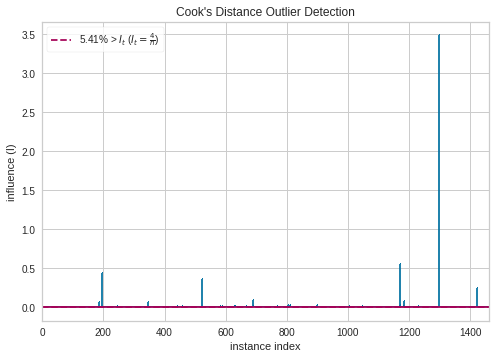

In [ ]:
from yellowbrick.regressor import CooksDistance

#data8 = pd.read_csv('train_1.csv', delimiter=',')
#labels = data8.SalePrice.values
#data8.drop('SalePrice', axis=1, inplace=True)
data8 = data2.fillna(0)
visualizer = CooksDistance()
visualizer.fit(data8, labels)
visualizer.show()

In [ ]:
influence = model_with_all_parameters.get_influence()
leverage = influence.hat_matrix_diag
cooks_d = influence.cooks_distance
data8[leverage == np.max(leverage)]

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:695: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_code,Street_code,LotShape_code,LandContour_code,Utilities_code,LotConfig_code,Neighborhood_code,LandSlope_code,Condition1_code,Condition2_code,BldgType_code,HouseStyle_code,RoofStyle_code,RoofMatl_code,Exterior1st_code,Exterior2nd_code,ExterQual_code,ExterCond_code,Foundation_code,Heating_code,HeatingQC_code,CentralAir_code,KitchenQual_code,Functional_code,PavedDrive_code,SaleType_code,SaleCondition_code,MasVnrType_code,BsmtQual_code,BsmtExposure_code,BsmtFinType1_code,BsmtFinType2_code,Electrical_code,GarageType_code,GarageFinish_code,GarageQual_code,GarageCond_code,WoodDeckSF_code,OpenPorchSF_code,Fence_code,MiscFeature_code,BsmtCond_code,FireplaceQu_code,Alley_code,PoolQC_code
944,945,20,0.0,14375,6,6,1958,1958,541.0,111,354,354,819,1344,0,0,1344,0,1,1,0,3,1,7,1,1958.0,2,525,0,0,233,0,0,1,2009,0,0,1,0,1,3,16,0,0,0,0,5,0,0,3,3,1,0,1,0,1,0,0,0,0,2,1,0,1,0,0,4,2,5,0,0,0,0,169,0,0,0,2,0,0


In [ ]:
data8['SalePrice'] = labels

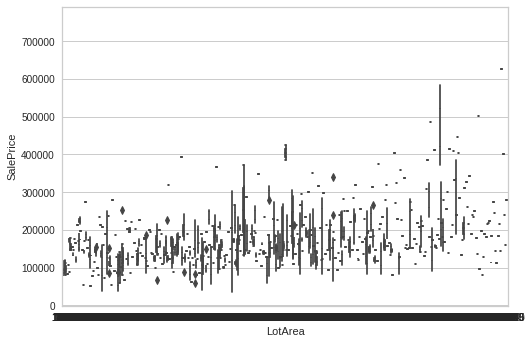

In [ ]:
ax = sns.boxplot(x='LotArea', y='SalePrice', data=data8)

For frequencies in case of a binary variable. We can sample from the empirical distribution of the given variable and we just need to count relative frequencies for each value and then simulate it.

## 9

In [ ]:
data9 = pd.read_csv('train_1.csv', delimiter=',')

indexes = [1, 3, 37, 71, 111]
for _index in indexes:
    data9.LotArea[_index] = np.nan
data9.fillna(data9.mean(), inplace=True)
print(f'Mean: {data9.LotArea.mean()}')
print(data9.LotArea.head())

Mean: 10523.39381443299
0     8450.000000
1    10523.393814
2    11250.000000
3    10523.393814
4    14260.000000
Name: LotArea, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


As we can see from code above, data set is used whole, not just selected features. Here we are replacing NaN data of LotArea using mean value of this column. We are using standard method of pandas fillna.

This is a quick fix but ‘mean’ as a statistic is not robust and it would not also scale well with categorical features. So imputing missing data with mean values can only be done with numerical data. Formula is below.

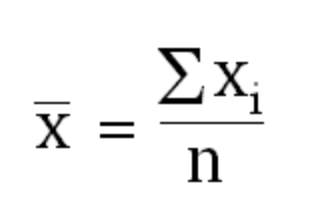 

In [ ]:
indexes = [1, 3, 37, 71, 111]
for _index in indexes:
    data9.LotArea[_index] = np.nan
data9.fillna(data9.mode().iloc[0], inplace=True)
print(f'Mode: {data9.LotArea.mode().iloc[0]}')
print(data9.LotArea.head())

Mode: 7200.0
0     8450.0
1     7200.0
2    11250.0
3     7200.0
4    14260.0
Name: LotArea, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


We can replace the missing values with the mode — or the most frequent values present in each column. This again does not take into account the correlations and can introduce bias in the data by unwantedly assigning more labels to a specific category. Formula is below. 

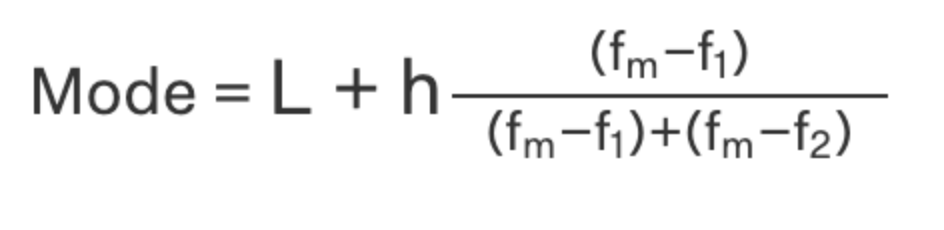

For this we are also using fillna, but we are sending another value which should be set.

I tried to replace values with fancyimpute and sklearn IterativeImputer, but it was a bit problamatic. 

Firstly, it doesn't "eat" strings columns.

Secondly, it returns numpy array not dataframe and it is problamatic when use some columns.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder


data9 = pd.read_csv('train_1.csv', delimiter=',')
le = LabelEncoder()

for i in data9:
  if pd.api.types.is_string_dtype(data9[i].dtype):
    data9[i] = le.fit_transform(data9[i])
imputer = IterativeImputer(max_iter=10, random_state=42)
imputer.fit(data9)
data9[:] = imputer.transform(data9)
data9

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,3.0,65.0,8450.0,1.0,2.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7.0,5.0,2003.0,2003.0,1.0,1.0,12.0,13.0,1.0,196.0,2.0,4.0,2.0,2.0,3.0,3.0,2.0,706.0,5.0,0.0,150.0,856.0,1.0,...,1.0,4.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,2.0,8.0,6.0,0.0,5.0,1.0,2003.0,1.0,2.0,548.0,4.0,4.0,2.0,0.0,61.0,0.0,0.0,0.0,0.0,3.0,4.0,4.0,0.0,2.0,2008.0,8.0,4.0,208500.0
1,2.0,20.0,3.0,80.0,9600.0,1.0,2.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,6.0,8.0,1976.0,1976.0,1.0,1.0,8.0,8.0,2.0,0.0,3.0,4.0,1.0,2.0,3.0,1.0,0.0,978.0,5.0,0.0,284.0,1262.0,1.0,...,1.0,4.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,3.0,6.0,6.0,1.0,4.0,1.0,1976.0,1.0,2.0,460.0,4.0,4.0,2.0,298.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,4.0,0.0,5.0,2007.0,8.0,4.0,181500.0
2,3.0,60.0,3.0,68.0,11250.0,1.0,2.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7.0,5.0,2001.0,2002.0,1.0,1.0,12.0,13.0,1.0,162.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,486.0,5.0,0.0,434.0,920.0,1.0,...,1.0,4.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,2.0,6.0,6.0,1.0,4.0,1.0,2001.0,1.0,2.0,608.0,4.0,4.0,2.0,0.0,42.0,0.0,0.0,0.0,0.0,3.0,4.0,4.0,0.0,9.0,2008.0,8.0,4.0,223500.0
3,4.0,70.0,3.0,60.0,9550.0,1.0,2.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,7.0,5.0,1915.0,1970.0,1.0,1.0,13.0,15.0,2.0,0.0,3.0,4.0,0.0,3.0,1.0,3.0,0.0,216.0,5.0,0.0,540.0,756.0,1.0,...,1.0,4.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,2.0,7.0,6.0,1.0,2.0,5.0,1998.0,2.0,3.0,642.0,4.0,4.0,2.0,0.0,35.0,272.0,0.0,0.0,0.0,3.0,4.0,4.0,0.0,2.0,2006.0,8.0,0.0,140000.0
4,5.0,60.0,3.0,84.0,14260.0,1.0,2.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,8.0,5.0,2000.0,2000.0,1.0,1.0,12.0,13.0,1.0,350.0,2.0,4.0,2.0,2.0,3.0,0.0,2.0,655.0,5.0,0.0,490.0,1145.0,1.0,...,1.0,4.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,2.0,9.0,6.0,1.0,4.0,1.0,2000.0,1.0,3.0,836.0,4.0,4.0,2.0,192.0,84.0,0.0,0.0,0.0,0.0,3.0,4.0,4.0,0.0,12.0,2008.0,8.0,4.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,3.0,62.0,7917.0,1.0,2.0,3.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,0.0,5.0,6.0,5.0,1999.0,2000.0,1.0,1.0,12.0,13.0,2.0,0.0,3.0,4.0,2.0,2.0,3.0,3.0,5.0,0.0,5.0,0.0,953.0,953.0,1.0,...,1.0,4.0,953.0,694.0,0.0,1647.0,0.0,0.0,2.0,1.0,3.0,1.0,3.0,7.0,6.0,1.0,4.0,1.0,1999.0,1.0,2.0,460.0,4.0,4.0,2.0,0.0,40.0,0.0,0.0,0.0,0.0,3.0,4.0,4.0,0.0,8.0,2007.0,8.0,4.0,175000.0
1456,1457.0,20.0,3.0,85.0,13175.0,1.0,2.0,3.0,3.0,0.0,4.0,0.0,14.0,2.0,2.0,0.0,2.0,6.0,6.0,1978.0,1988.0,1.0,1.0,9.0,10.0,3.0,119.0,3.0,4.0,1.0,2.0,3.0,3.0,0.0,790.0,4.0,163.0,589.0,1542.0,1.0,...,1.0,4.0,2073.0,0.0,0.0,2073.0,1.0,0.0,2.0,0.0,3.0,1.0,3.0,7.0,2.0,2.0,4.0,1.0,1978.0,2.0,2.0,500.0,4.0,4.0,2.0,349.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,4.0,0.0,2.0,2010.0,8.0,4.0,210000.0
1457,1458.0,70.0,3.0,66.0,9042.0,1.0,2.0,3.0,3.0,0.0,4.0,0.0,6.0,2.0,2.0,0.0,5.0,7.0,9.0,1941.0,2006.0,1.0,1.0,5.0,5.0,2.0,0.0,0.0,2.0,4.0,3.0,1.0,3.0,2.0,275.0,5.0,0.0,877.0,1152.0,1.0,...,1.0,4.0,1188.0,1152.0,0.0,2340.0,0.0,

In [ ]:
!pip3 install fancyimpute
from fancyimpute import IterativeImputer as MICE

trans = MICE()

MICE().fit_transform(data9)

     |████████████████████████████████| 154 kB 6.5 MB/s 
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=9d38445b0ee3408dc6a7883707d5ed6bd9a8f3a844884ac5541d29ca4d71aa3e
  Stored in directory: /root/.cache/pip/wheels/e3/04/06/a1a7d89ef4e631ce6268ea2d8cde04f7290651c1ff1025ce68
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=ac2fe4b468e4aa4a5ee0de035148eb7f39569b71f11836811bbe90b385ee2e09
  Stored in directory: /root/.cache/pip/wheels/72/21/a8/a045cacd9838abd5643f6bfa852c0796a99d6b1494760494e0
Successfully built fancyimpute knnimpute


array([[1.00000e+00, 6.00000e+01, 3.00000e+00, ..., 8.00000e+00,
        4.00000e+00, 2.08500e+05],
       [2.00000e+00, 2.00000e+01, 3.00000e+00, ..., 8.00000e+00,
        4.00000e+00, 1.81500e+05],
       [3.00000e+00, 6.00000e+01, 3.00000e+00, ..., 8.00000e+00,
        4.00000e+00, 2.23500e+05],
       ...,
       [1.45800e+03, 7.00000e+01, 3.00000e+00, ..., 8.00000e+00,
        4.00000e+00, 2.66500e+05],
       [1.45900e+03, 2.00000e+01, 3.00000e+00, ..., 8.00000e+00,
        4.00000e+00, 1.42125e+05],
       [1.46000e+03, 2.00000e+01, 3.00000e+00, ..., 8.00000e+00,
        4.00000e+00, 1.47500e+05]])

Also, one approach is simple to drop all rows with nan values.

In [ ]:
data9 = pd.read_csv('train_1.csv', delimiter=',')
data9.dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


## 10

I will use features which was selected by forward selection.

OverallQual: 0.00000

GrLivArea: 0.00000

MSSubClass: 0.00000

BsmtFullBath: 0.00000

LotFrontage: 0.00159

YearRemodAdd: 0.00001

GarageArea: 0.00005

Fireplaces: 0.00055

In [ ]:
#data3 = data2.fillna(0)
data_10 = data2[['OverallQual', 'GrLivArea', 'MSSubClass', 'BsmtFullBath', 'LotFrontage', 'YearRemodAdd', 'GarageArea', 'Fireplaces']]
data_10['SalePrice'] = labels
data_10 = data_10.dropna()
labels_10 = data_10.SalePrice
data_10.drop('SalePrice', axis=1, inplace=True)
#data2.SalePrice
model_with_selected_parameters = sm.OLS(labels_10, data_10).fit()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
model_with_selected_parameters.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              3547.
Date:                Sun, 16 Jan 2022   Prob (F-statistic):                        0.00
Time:                        18:36:41   Log-Likelihood:                         -14430.
No. Observations:                1201   AIC:                                  2.888e+04
Df Residuals:                    1193   BIC:                                  2.892e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
OverallQual   2.837e+04   1180.263     24.038      0.000    2.61e+04    3.07e+04
GrLivArea       50.7037      3.168     16.004      0.000      44.488      56.920
MSSubClass    -229.8445     30.646     -7.500      0.000    -289.970    -169.719
BsmtFullBath  2.039e+04   2292.876      8.894      0.000    1.59e+04    2.49e+04
LotFrontage   -104.0650     59.420     -1.751      0.080    -220.645      12.514
YearRemodAdd   -45.2991      3.330    -13.603      0.000     -51.833     -38.765
GarageArea      58.6958      6.793      8.641      0.000      45.368      72.023
Fireplaces    8374.8135   2161.223      3.875      0.000    4134.592    1.26e+04
==============================================================================
Omnibus:                      321.531   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21356.857
Skew:                           0.199   Prob(JB):                         0.00
Kurtosis:                      23.655   Cond. No.                     5.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
labels_logged_10 = np.log(labels_10)
#ata_10.drop('SalePrice', axis=1, inplace=True)
#data2.SalePrice
model_with_selected_parameters_logged = sm.OLS(labels_logged_10, data_10).fit()
model_with_selected_parameters_logged.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.065e+05
Date:                Sun, 16 Jan 2022   Prob (F-statistic):                        0.00
Time:                        18:44:00   Log-Likelihood:                          391.52
No. Observations:                1201   AIC:                                     -767.0
Df Residuals:                    1193   BIC:                                     -726.3
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
OverallQual      0.1061      0.005     20.571      0.000       0.096       0.116
GrLivArea        0.0002   1.38e-05     15.224      0.000       0.000       0.000
MSSubClass      -0.0009      0.000     -6.698      0.000      -0.001      -0.001
BsmtFullBath     0.0868      0.010      8.665      0.000       0.067       0.106
LotFrontage   7.122e-05      0.000      0.274      0.784      -0.000       0.001
YearRemodAdd     0.0055   1.45e-05    376.738      0.000       0.005       0.006
GarageArea       0.0003   2.97e-05      9.651      0.000       0.000       0.000
Fireplaces       0.0756      0.009      8.007      0.000       0.057       0.094
==============================================================================
Omnibus:                      717.795   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19498.122
Skew:                          -2.258   Prob(JB):                         0.00
Kurtosis:                      22.216   Cond. No.                     5.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In task was not written to split data to train and test sets, so I will follow this rules and will not split it.

In [ ]:
data_10
difference = model_with_selected_parameters_logged.predict(data_10) - model_with_selected_parameters.predict(data_10)
test_difference = pd.concat([data_10, difference], axis=1)
test_difference_cols = test_difference.columns.values
test_difference_cols[-1] = 'difference'
test_difference.columns = test_difference_cols
model_lin = sm.OLS(labels_10, test_difference).fit()
print('simple: {:.3f}'.format(model_lin.params['difference']))

simple: -1.000


here we can reject H0 hypothesis

In [ ]:
model_lin = sm.OLS(labels_logged_10, test_difference).fit()
print('log = {:.3f}'.format(model_lin.params['difference']))

log = -0.000


here we aceept H0 hypothesis

Model with log SalePrice is better than the model without.

## Problem 6

## 1

Let's generate some data to perform a couple of experiments. We'll sample 2 regressors from N(10, 9) and we'll get target variable as:

In [ ]:
x = np.random.normal(10, 2, [100, 2])
eps = np.random.normal(0, 1)
y = x[:, 0] + 3*x[:, 1] + 1 + eps

In [ ]:
model = sm.OLS(y, x)
result = model.fit()
r2 = float(result.summary().tables[0][0][3].data)
print('R^2: {:.2f}'.format(r2))

R^2: 1.00


Let's try to shift our target variable.

In [ ]:
y_shifted = y + 10
model = sm.OLS(y_shifted, x)
result = model.fit()
r2 = float(result.summary().tables[0][0][3].data)
print('R^2: {:.2f}'.format(r2))

R^2: 1.00


In [ ]:
y_shifted = y - 10
model = sm.OLS(y_shifted, x)
result = model.fit()
r2 = float(result.summary().tables[0][0][3].data)
print('R^2: {:.2f}'.format(r2))

R^2: 1.00


Here we have completely different target variable, but coefficient of determination is still the same.

## 2

In [ ]:
x = np.random.normal(10, 2, [100, 2])
eps = np.random.normal(0, 1)
y = x[:, 0] + 3 * x[:, 1] + 1 + eps

In [ ]:
model = sm.OLS(y, x)
result = model.fit()
r2 = float(result.summary().tables[0][0][3].data)
print('R^2: {:.2f}'.format(r2))

x[:, 0] = x[:, 0] - 10
model = sm.OLS(y, x)
result = model.fit()
r2 = float(result.summary().tables[0][0][3].data)
print('R^2: {:.2f}'.format(r2))

R^2: 1.00
R^2: 0.91


We tried to shift some regressors and the coefficient of determination is still the same and it has no impact on the coefficient of determination.

## 3

In [ ]:
x = np.random.normal(10, 2, [100, 2])
eps = np.random.normal(0, 1)
y = x[:, 0] + 3 * x[:, 1] + 1 + eps

In [ ]:
x[:, 0] = x[:, 0] - x[:, 0].mean()
x[:, 1] = x[:, 1] - x[:, 1].mean()
y = y - y.mean()

In [ ]:
model = sm.OLS(y, x)
result = model.fit()
r2 = float(result.summary().tables[0][0][3].data)
print('R^2 on scaled data: {:.2f}'.format(r2))

R^2 on scaled data: 1.00


Here we can see that the coefficient of the our determination is still the same.

## Problem 7

# A

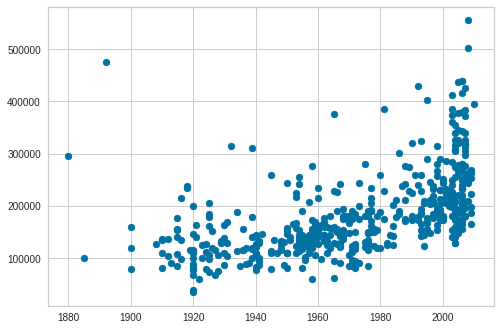

In [ ]:
data = pd.read_csv('train_1.csv', delimiter=',')
#data = data[["SalePrice", 'YearBuilt']].dropna().loc[:500]
plt.scatter(data.YearBuilt[:500], data.SalePrice[:500])
plt.show()

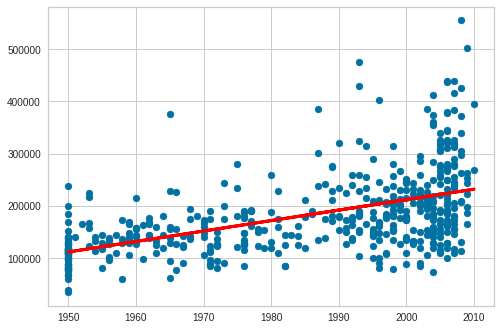

In [ ]:
# values converts it into a numpy array
X_linear = data.iloc[:, 20].values.reshape(-1, 1)[:500]
# -1 means that calculate the dimension of rows, but have 1 column
Y_linear = data.iloc[:, -1].values.reshape(-1, 1)[:500]
linear_regressor = LinearRegression()
linear_regressor.fit(X_linear, Y_linear)
Y_pred = linear_regressor.predict(X_linear)
linear_regressor.score(X_linear, Y_linear)
plt.scatter(X_linear, Y_linear)
plt.plot(X_linear, Y_pred, color="red", linewidth=3)
plt.show()

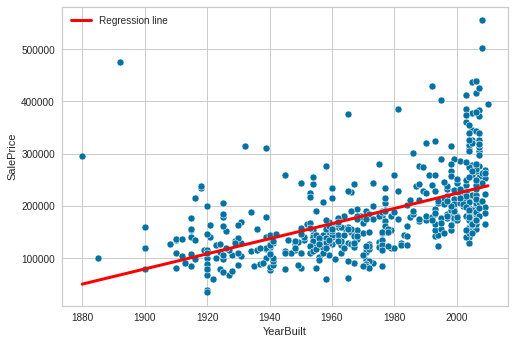

In [ ]:
from sklearn.linear_model import LinearRegression

X_long = data['YearBuilt'][:500].values.reshape(-1, 1)
y = data['SalePrice'][:500]
linear_regression = LinearRegression(fit_intercept=True).fit(X_long, y)

xx = np.linspace(X_long.min(), X_long.max(), 100)
yy = linear_regression.predict(xx.reshape(-1, 1))

plt.plot(xx, yy, 'red', linewidth=3, label='Regression line')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
sns.scatterplot(x='YearBuilt', y=y, data=data)

# B

In [ ]:
!pip install lmfit

     |████████████████████████████████| 292 kB 3.9 MB/s 
     |████████████████████████████████| 40 kB 5.1 MB/s 
     |████████████████████████████████| 98 kB 7.0 MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.3-py3-none-any.whl size=84402 sha256=6b72924e9f039bbf217d91336ca5a81f77d3ddc2074df64772a95922e5f7ce71
  Stored in directory: /root/.cache/pip/wheels/b9/7a/d1/236aa0f8196b264fda481a112f7cfb1bfde7bfb20235f8e331
  Created wheel for asteval: filename=asteval-0.9.26-py3-none-any.whl size=17648 sha256=f24f2642641a2d400ac2cde5a87e98777976ee9d68b33386fa4bc3b80b3ad18b
  Stored in directory: /root/.cache/pip/wheels/4c/e9/f0/bc343d5b77d2fded45177f424a6b0b9224b92ff6e7c150bad4
Successfully built lmfit asteval


In [ ]:
import lmfit

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:52

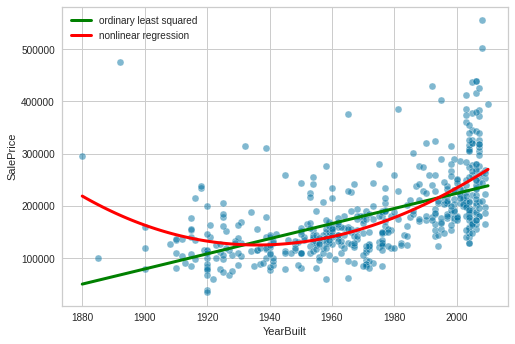

In [ ]:
X = data['YearBuilt'][:500]
Y = data['SalePrice'][:500]

def nonlinear_function(x, a, b, c, d):
    return a + b * x + c * x**2 + d * x**3  

nonlinear_regression = lmfit.Model(nls_func)
lm_result = nonlinear_regression.fit(Y, x=X, a=1., b=1., c=1., d=1.)

params = [v.value for v in lm_result.params.values()]
xx = np.linspace(X.min(), X.max(), 100)

sns.scatterplot(X, Y, label=None, alpha=0.5)
sns.lineplot(xx, linear_regression.predict(xx.reshape(-1, 1)), c='green', linewidth=3, label='ordinary least squared')
sns.lineplot(xx, nonlinear_function(xx, *params), c='red', linewidth=3, label='nonlinear regression')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.legend()

plt.show()

# C

Tests which we applied previously cannot be applied to nonlinear regression as it was applied to linear.

Because these tests are based on usege of the hypothesis testing with ability to reject the hypothesis based on p-value and p-value in linear testing is based on t-value of some destribution. Here we cannot know about distribution, because it is nonlinear function and we cannot tell that it is normal distribution or f-distribution.

Also, R-squared Valid for Only Linear Regression.

# D

Potential problems with nonlinear regression:
- numerical computation of maximum likelihood estimates. Usually the computation of MLE is based on an iterative process that requires carefully chosen initial starting points to avoid convergence to local optima. Depending upon the nonlinear function this can be a challenging problem;
- confidence intervals. if the parameter is either a non-linear function of the regression parameters or if the model is a nonlinear model, then they are not necessarily accurate, unless the sample sizes are very large. Basically the large sample theory confidence intervals are derived by “linearizing” the nonlinear function.